## Import Libraries 

In [3]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from imblearn.combine import SMOTEENN

* Reading Csv

In [17]:
df = pd.read_csv(r"tel_churn.csv")

In [18]:
df.head()

,Unnamed: 0,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,1,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,3,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,4,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [19]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [20]:
df.head()

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,29.85,29.85,0,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,56.95,1889.50,0,0,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,53.85,108.15,1,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,70.70,151.65,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


* Assigning value to the X & Y variables

In [21]:
x = df.drop('Churn', axis =1)
y = df['Churn']

In [22]:
x.shape, y.shape

((7032, 51), (7032,))

* Training set & test set split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

**Decision Tree Classifier**

In [27]:
model_dt = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf= 8)

In [28]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [29]:
y_pred = model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [30]:
model_dt.score(x_test, y_test)

0.7981520966595593

In [31]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1015
           1       0.67      0.53      0.60       392

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



**It is clear as our data set is imbalanced so we can't rely on accuracy so we look for recall, precision and f1-score for minority class and these metrics are too low for class1(Churned Customer)**

**Hence I am doing upsampeling for compensate imbalanced data set**

In [34]:
sm = SMOTEENN()

In [36]:
x_resampled, y_resampled = sm.fit_resample(x, y)

In [37]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size = 0.2)

In [38]:
model_dt_smot = DecisionTreeClassifier(criterion ='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [39]:
model_dt_smot.fit(xr_train, yr_train)
yr_pred = model_dt_smot.predict(xr_test)
model_score_r = model_dt_smot.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_pred))

0.9333333333333333
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       529
           1       0.91      0.98      0.94       641

    accuracy                           0.93      1170
   macro avg       0.94      0.93      0.93      1170
weighted avg       0.94      0.93      0.93      1170



In [40]:
print(metrics.confusion_matrix(yr_test, yr_pred))

[[467  62]
 [ 16 625]]


**Now we can see better results, i.e Accuracy 93% and very good recall, precision, & f1-score.**


* **Lets try some other classifier**

**Random forest Classifier**

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8 )

In [44]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [45]:
y_pred = model_rf.predict(x_test)

In [46]:
model_rf.score(x_test, y_test)

0.7995735607675906

In [47]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1015
           1       0.70      0.49      0.58       392

    accuracy                           0.80      1407
   macro avg       0.76      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



**By using upsampeling data set**

In [48]:
model_rf_smot=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=6, random_state=100, min_samples_leaf=8)

In [49]:
model_rf_smot.fit(xr_train, yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [50]:
yr_pred = model_rf_smot.predict(xr_test)

In [53]:
model_score_r1 = model_rf_smot.score(xr_test, yr_test)
print(model_score_r1)

0.9324786324786325


In [54]:
print(metrics.classification_report(yr_test, yr_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       529
           1       0.91      0.97      0.94       641

    accuracy                           0.93      1170
   macro avg       0.94      0.93      0.93      1170
weighted avg       0.93      0.93      0.93      1170



In [55]:
print(metrics.confusion_matrix(yr_test, yr_pred))

[[469  60]
 [ 19 622]]


**Now impliment K-NN Algorithm**

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [145]:
model_knn = KNeighborsClassifier(n_neighbors = 3)

In [146]:
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [147]:
y_pred = model_knn.predict(x_test)

In [148]:
model_score_r2 = model_knn.score(x_test, y_test)

In [149]:
print(model_score_r2)

0.7412935323383084


In [150]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1015
           1       0.54      0.48      0.51       392

    accuracy                           0.74      1407
   macro avg       0.67      0.66      0.67      1407
weighted avg       0.73      0.74      0.74      1407



In [151]:
print(metrics.confusion_matrix(y_test, y_pred))

[[855 160]
 [204 188]]


**On balanced data-set**

In [139]:
model_knn_smot = KNeighborsClassifier(n_neighbors=3)

In [140]:
model_knn_smot.fit(xr_train, yr_train)

KNeighborsClassifier(n_neighbors=3)

In [141]:
yr_pred = model_knn_smot.predict(xr_test)

In [142]:
model_score = model_knn_smot.score(xr_test, yr_test)
print(model_score)

0.9769230769230769


In [143]:
print(metrics.classification_report(yr_test, yr_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       529
           1       0.97      0.99      0.98       641

    accuracy                           0.98      1170
   macro avg       0.98      0.98      0.98      1170
weighted avg       0.98      0.98      0.98      1170



In [144]:
print(metrics.confusion_matrix(yr_test, yr_test))

[[529   0]
 [  0 641]]


**Out of three classifier K-NN giving best result.**

**Here we prefet k-NN algorithm out of the above three models.**

In [1]:
import matplotlib.pyplot as plt


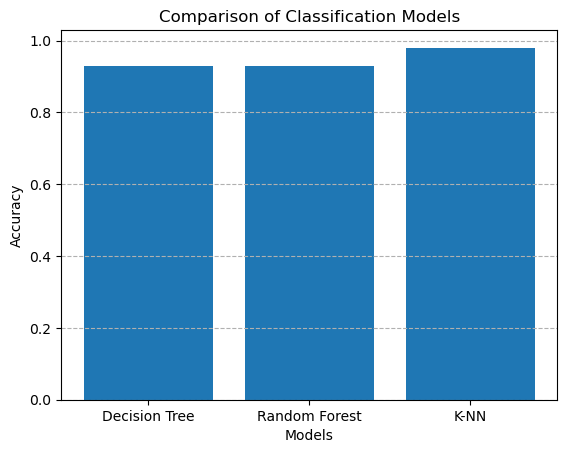

<Figure size 600x600 with 0 Axes>

In [3]:
models = ['Decision Tree', 'Random Forest', 'K-NN']
accuracy = [0.93, 0.93, 0.98]
plt.bar(models, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Models')
plt.grid(True, axis='y', linestyle='--')
plt.figure(figsize=(6, 6))
plt.show()

